In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
dirPath = 'C:\\Users\\dr075068\\Downloads\\Personal_Files\\Data\\'
#from "../config/config.py" import *

In [20]:
# Point at directory - lives outside current dir

fileList = [f for f in listdir(dirPath) if isfile(join(dirPath, f))]
numList = []
j = 0
for i in fileList:
    numList.append(j)
    j+=1
fileDirectory = zip(fileList, numList)
print(fileList)
for i in fileDirectory:
    print(i)
selection = int(input("Pick a file (enter the number):"))

dataPath = dirPath + fileList[selection]
print(dataPath)
#data_path = 'C:\\Users\\dr075068\\Downloads\\Personal_Files\\Data\\GOOG.csv'

csvDf = pd.read_csv(dataPath)


['GOOG.csv', 'INTC.csv', 'MSFT.csv']
('GOOG.csv', 0)
('INTC.csv', 1)
('MSFT.csv', 2)
Pick a file (enter the number):1
C:\Users\dr075068\Downloads\Personal_Files\Data\INTC.csv


In [21]:
csvDf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-08,47.619999,47.950001,47.070000,47.820000,46.743771,16564300
1,2019-07-09,47.360001,47.799999,47.130001,47.750000,46.675346,17853200
2,2019-07-10,47.919998,48.610001,47.900002,48.209999,47.124992,16032300
3,2019-07-11,48.560001,48.779999,48.310001,48.599998,47.506214,16615100
4,2019-07-12,49.000000,49.930000,48.810001,49.919998,48.796505,20148700


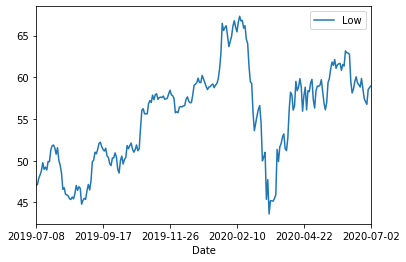

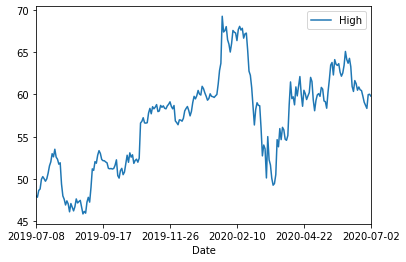

In [22]:
# Plot some data
csvDf.plot(x="Date", y="Low")
csvDf.plot(x="Date", y="High")

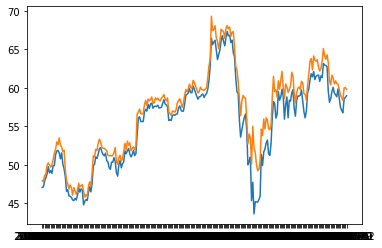

In [23]:
plt.plot(csvDf['Date'], csvDf['Low'])
plt.plot(csvDf['Date'], csvDf['High'])

In [24]:
#As we can see above - there is in fact a gap between the two. Perform calculation of the distance 
# between high and low of current day
csvDf['HiLoDiff'] = csvDf['High'] - csvDf['Low']

csvDf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HiLoDiff
0,2019-07-08,47.619999,47.950001,47.070000,47.820000,46.743771,16564300,0.880001
1,2019-07-09,47.360001,47.799999,47.130001,47.750000,46.675346,17853200,0.669998
2,2019-07-10,47.919998,48.610001,47.900002,48.209999,47.124992,16032300,0.709999
3,2019-07-11,48.560001,48.779999,48.310001,48.599998,47.506214,16615100,0.469998
4,2019-07-12,49.000000,49.930000,48.810001,49.919998,48.796505,20148700,1.119999


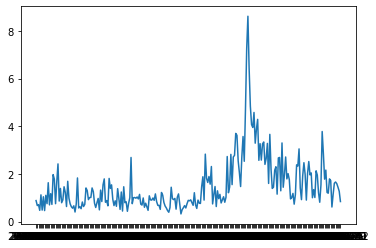

In [25]:
# Plot that difference over time
plt.plot(csvDf['Date'], csvDf['HiLoDiff'])

In [26]:
# We have some distance to work with here. But what we really care about is the % difference.
#  This is a blue chip stock (GOOGLE) ergo most likely won't have a large % fluctuation intraday


#Calculate % of price as difference - that is, the % return if purchased at low, and sold at high (with no fees)
csvDf['PercDiff'] = (csvDf['HiLoDiff'] * 100/ csvDf['Low'])
csvDf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HiLoDiff,PercDiff
0,2019-07-08,47.619999,47.950001,47.070000,47.820000,46.743771,16564300,0.880001,1.869558
1,2019-07-09,47.360001,47.799999,47.130001,47.750000,46.675346,17853200,0.669998,1.421596
2,2019-07-10,47.919998,48.610001,47.900002,48.209999,47.124992,16032300,0.709999,1.482253
3,2019-07-11,48.560001,48.779999,48.310001,48.599998,47.506214,16615100,0.469998,0.972879
4,2019-07-12,49.000000,49.930000,48.810001,49.919998,48.796505,20148700,1.119999,2.294610


In [27]:
# Now we use our reference chart - 
# APR
# 30 | M 2.5% | D 0.0821 %
# 20 | M 1.7% | D 0.0548 %
# 10 | M 0.8% | D 0.0274 %

# So our intraday difference, if captured, would provide a significant amount of return. So if you have
# > $1000 to invest, theoretically this stock could work for this trading approach

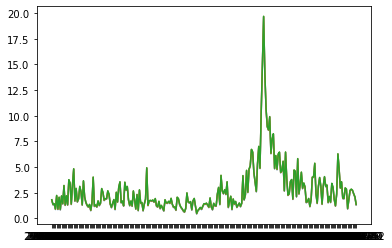

In [28]:
# Plot against our references
csvDf['40'] = 0.1096
csvDf['30'] = 0.0821
csvDf['20'] = 0.0548
csvDf['40diff'] = csvDf['PercDiff'] - csvDf['40']
csvDf['30diff'] = csvDf['PercDiff'] - csvDf['30']
csvDf['20diff'] = csvDf['PercDiff'] - csvDf['20']
plt.plot(csvDf['Date'], csvDf['40diff'])
plt.plot(csvDf['Date'], csvDf['30diff'])
plt.plot(csvDf['Date'], csvDf['20diff'])

In [29]:
#Theoretically, this indicates that out intraday hi-lo spread will always be profitable for this stock.

In [30]:
#Simulate what would happen if buying 10% hi-lo difference above the minimum buy, and selling 10% of distance below
lows = []
highs = []

#Save highs and lows to lists
for i in csvDf['Low']:
    lows.append(i)
for j in csvDf['High']:
    highs.append(j)

length = len(lows)
print(length)
#loop through and compare values
i = 0
total = 0
while i < (length - 1):
    buyDiff = highs[i] - lows[i]
    buyPrice = lows[i] + (buyDiff * .10)
    sellDiff = highs[i+1] - lows[i+1]
    sellPrice = highs[i+1] - (sellDiff * .10)
    print(sellPrice - buyPrice)
    total += (sellPrice - buyPrice)
    i += 1
print(total)


251
0.5749990999999994
1.3420003000000094
0.7619972999999902
1.4609992999999974
1.2799990999999977
0.07799989999999468
0.5900020000000055
0.5939997999999989
1.5850006999999948
1.3719999000000058
1.8770008000000047
1.4830017000000026
0.6109991000000008
1.350999200000004
0.6550016999999997
1.2770018000000007
-0.08200019999999597
1.4309999999999903
-0.4379999000000012
-0.7650010000000051
0.7720009999999959
-0.05999910000000597
1.1629980999999958
0.8220000000000027
0.10500079999999912
1.3780001000000013
1.0030002999999965
0.35799800000000204
1.1040010000000038
1.421997399999995
-0.04200170000000725
0.7240018000000035
0.426000700000003
-0.3169983000000016
0.7800007999999963
0.7509991000000014
0.29399999999999693
1.7140020000000007
1.244999
-0.0749992000000006
2.2370009000000053
3.3589970999999963
0.8980029000000016
1.7669988999999973
0.6180003000000056
1.7179992000000013
1.683000800000002
0.7269998000000015
-0.07599899999998883
0.3019978999999964
0.6040027999999964
0.6840017000000032
0.1990

In [17]:
# From this, we see there are some opportunities where we would lose money, likely where the market fell 
#   out between days. But the total shows over $5000 dollars to be made off of this approach

In [18]:
# Simple Simulator:

limitBuy = 0
limitSell = 0
priceData = []

#Get data
priceData = zip(lows, highs)
for i in priceData:
    print(i)
    
#TO DO: grab user input for limit buy. Then simulate how long it takes to fill that market order. 
#Take in limit sell from user. Then simulate how long it takes to fill - loop to next day,
# calculate needed price for a range of APRs (increments of 10), then ask user if would like to update
# Loop until order fills, then calculate and output captured ROI

(135.369995, 137.100006)
(135.800003, 136.970001)
(137.020004, 138.580002)
(137.869995, 139.220001)
(138.009995, 139.130005)
(138.46000700000002, 139.53999299999998)
(136.520004, 139.050003)
(136.220001, 137.929993)
(134.669998, 136.619995)
(136.449997, 140.669998)
(137.330002, 139.190002)
(138.029999, 139.990005)
(138.850006, 140.740005)
(139.320007, 140.610001)
(140.300003, 141.679993)
(139.369995, 141.509995)
(139.800003, 141.220001)
(135.080002, 140.490005)
(136.929993, 140.940002)
(135.259995, 138.320007)
(130.779999, 133.929993)
(133.21000700000002, 135.679993)
(131.830002, 135.649994)
(135.929993, 138.990005)
(136.46000700000002, 139.380005)
(135.240005, 137.860001)
(135.0, 138.800003)
(133.669998, 136.919998)
(132.25, 134.580002)
(134.720001, 136.46000700000002)
(136.889999, 138.550003)
(137.240005, 138.71000700000002)
(138.0, 139.490005)
(136.28999299999998, 139.199997)
(132.800003, 138.350006)
(133.899994, 135.559998)
(134.66000400000001, 136.720001)
(133.550003, 135.759995)


In [ ]:
#Quik Mafs - check what investment amounts would be needed to earn $50K a year given different ROIs
for i in range(1, 10, 1):
    rate = i/10
    principalAmt = 50000/(rate)
    print(f'At Rate {rate}, principal amount of ${principalAmt} is needed.')
#PRINCIPAL * rate = 50000

In [ ]:
# NEXT TO DO - BUY/SELL SIM - Simulate buying at a given price on a given day, then see if returns are
#  truly realized.

# FUTURE ROADMAP - Track purchased stocks. Calculate sell limits on each consecutive day

In [ ]:
# LIMITATIONS of this trading approach - We don't technically realize the returns of the target rate
#   on our full investment. Instead, we realize these returns on the volume of COGS that is moved on 
#   a given day as long as we trade above the target return rate. Not accounting for tax.